### Part 1 : EDA and data preprocessing

In [1]:
! pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import pandas as pd
#import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

In [2]:
# Reading of dataset

datawal=pd.read_csv("Walmart_Store_sales.csv") 
datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [135]:
# Basic statistics

# -> CPI ("Consumer price index") : This index measures the change in prices for the essential goods 
# and services that the least wealthy in our society must consume, such as rent, food and energy.

print("------------------------")
print("Basics statistics: ")
data_desc = datawal.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

print("details of features : ")
datawal.info()
print("------------------------")


------------------------
Basics statistics: 


/tmp/ipykernel_57/1924334828.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_desc = datawal.describe(include='all')


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
count,109.000000,109,1.090000e+02,109.000000,98.000000,98.000000,100.000000,98.000000,109.000000,109.000000,109.000000,109.000000
unique,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2010-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.247706,NaN,1.253576e+06,0.073394,59.645918,3.308255,175.793196,7.719990,2010.844037,6.908257,15.743119,3.743119
std,6.117909,NaN,6.696984e+05,0.261987,17.792680,0.488328,40.236964,1.723843,0.829707,3.454844,8.655338,1.272237
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,0.000000
25%,5.000000,NaN,5.706112e+05,0.000000,44.920000,2.843250,131.071056,6.690000,2010.000000,4.000000,8.000000,4.000000



Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     10.091743
Fuel_Price      10.091743
CPI              8.256881
Unemployment    10.091743
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
dtype: float64


details of features : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         109 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  109 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           100 non-null    float64       
 7   Unemployment  98 non-null     float64       
 8   year          109 non-null    int64         
 9   month         109 non-null    int64         
 10  day           109 non-null    int64         
 11  weekday       109 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 11.1 KB
------------------------


In [136]:
# Drop rows with Nan in Date column and HolidayFlag

datawal = datawal[datawal['Date'].notna() & datawal['Holiday_Flag'].notna()] 
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [5]:
# Drop rows without "y" column (Weekly_sales)

datawal = datawal[datawal['Weekly_Sales'].notna()] 
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [137]:
# Convert date in datetime object

datawal['Date'] = pd.to_datetime(datawal['Date'])  
datawal.info()

# Confirmation of Dtype for "Date" feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         109 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  109 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           100 non-null    float64       
 7   Unemployment  98 non-null     float64       
 8   year          109 non-null    int64         
 9   month         109 non-null    int64         
 10  day           109 non-null    int64         
 11  weekday       109 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 11.1 KB


In [138]:
#Create 4 columns for splitting date

datawal['year'] = datawal['Date'].dt.year    
datawal['month'] = datawal['Date'].dt.month
datawal['day'] = datawal['Date'].dt.day
datawal['weekday'] = datawal['Date'].dt.weekday
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [139]:
# Check of missing values

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     10.091743
Fuel_Price      10.091743
CPI              8.256881
Unemployment    10.091743
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='Unemployment'>

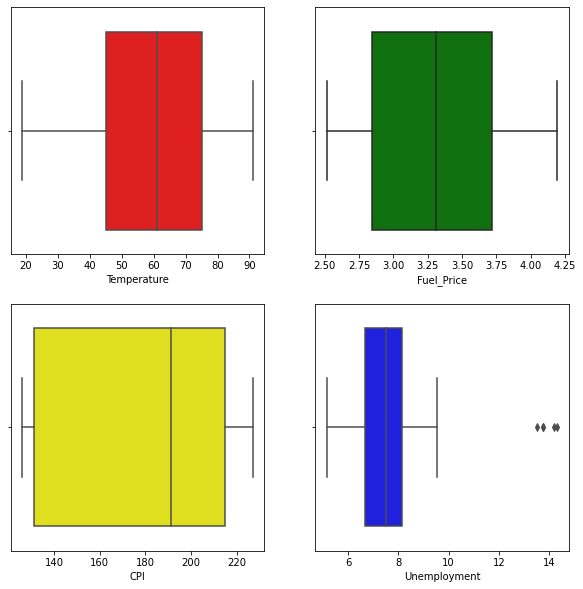

In [140]:
# Detect outliers for Temperature, Fuel_price, CPI and Unemployment features
# There are outliers for the feature "Unemployment". We will check and remove them in the next step

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(datawal['Temperature'],color="red") 
plt.subplot(222)
sns.boxplot(datawal['Fuel_Price'],color="green")
plt.subplot(223)
sns.boxplot(datawal['CPI'],color="yellow")
plt.subplot (224)
sns.boxplot(datawal['Unemployment'],color="blue")

In [141]:
#cleaning of outliers

datawal['Unemployment'].mean()

7.719989795918366

In [142]:
datawal["Unemployment"].std()*3

5.171528481416763

In [143]:
upper_bound = datawal["Unemployment"].mean()+datawal["Unemployment"].std()*3
upper_bound

12.891518277335129

In [144]:
lower_bound = datawal["Unemployment"].mean()-datawal["Unemployment"].std()*3
lower_bound

2.548461314501603

In [145]:
mask = (datawal["Unemployment"] < upper_bound) & (datawal["Unemployment"] > lower_bound)
mask

1       True
4       True
5       True
6       True
7       True
       ...  
144     True
145     True
147    False
148    False
149     True
Name: Unemployment, Length: 109, dtype: bool

In [146]:
clean_datawal = datawal.loc[mask, :]  
clean_datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4


In [147]:
# Replacing missing values by "mean" method 

clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
clean_datawal['CPI'].fillna(value=clean_datawal['CPI'].mean(), inplace=True)
clean_datawal['Unemployment'].fillna(value=clean_datawal['Unemployment'].mean(), inplace=True)

/tmp/ipykernel_57/296008314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
/tmp/ipykernel_57/296008314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
/tmp/ipykernel_57/296008314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['

In [148]:
# Check if ok about "fillna"

print("Percentage of missing values: ")  
display(100*clean_datawal.isnull().sum()/clean_datawal.shape[0])
print()

Percentage of missing values: 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
dtype: float64

In [149]:
clean_datawal.shape

# it remains 93 rows for preprocessing

(93, 12)

In [150]:
# Reorganisation of columns before EDA
# Reminder Y : Weekly_Sales

clean_datawal = clean_datawal[['Store',  
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','year',
 'month',
 'day',
 'weekday','Weekly_Sales']]

clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
1,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
4,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
5,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
6,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
7,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
142,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
143,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
144,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
145,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


In [151]:
# Reinitialisate index first column

clean_datawal = clean_datawal.reset_index(drop=True)
clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
0,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
1,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
2,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
3,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
4,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
89,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
90,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
91,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


<AxesSubplot:>

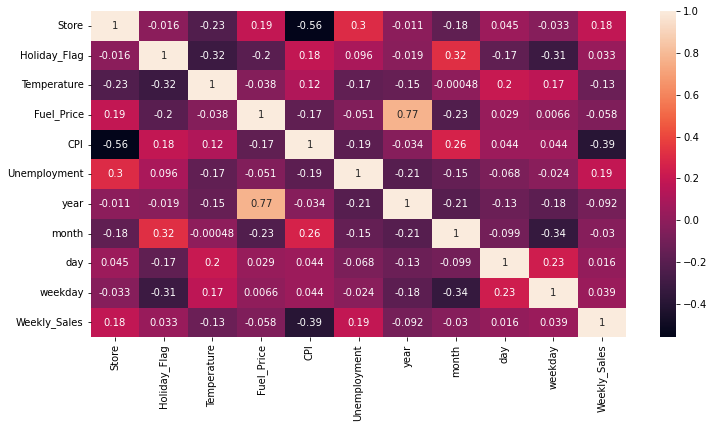

In [152]:
# Heatmap + some visualizations to check coorelations

corr = clean_datawal.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

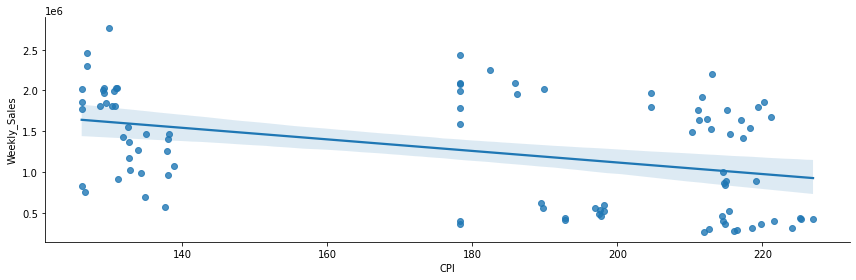

In [153]:
sns.lmplot(x="CPI", y="Weekly_Sales", data=clean_datawal, height=4,aspect=3)

# The more CPI increases, the more weekly sales decreases (coeff -0,39)

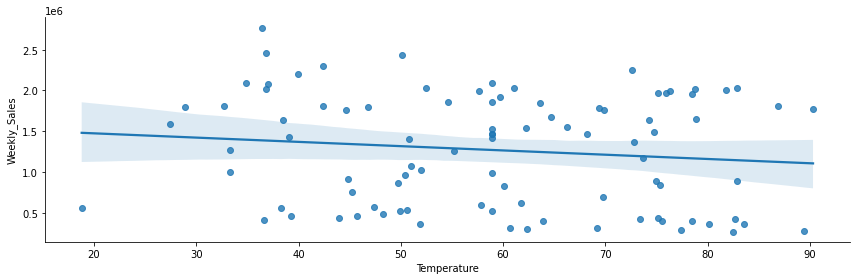

In [154]:
sns.lmplot(x="Temperature", y="Weekly_Sales", data=clean_datawal, height=4,aspect=3)

# The more Temperature increases, the more weekly sales decreases (coeff -0,13)
# It is not a strong coorelation and the impact is limited 

#### --> Sales Increases when Unemployment increases too but slightly

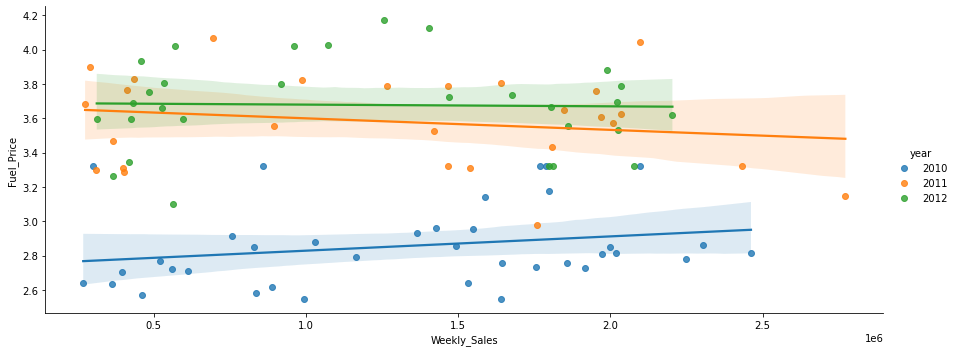

In [155]:
sns.lmplot(x="Weekly_Sales", y="Fuel_Price", data=clean_datawal,hue="year", height=5,aspect=2.5)

# Fuel price has not relly impact on sales each year 

### Preprocessing

In [296]:
# Remove date columns

useless_cols = ['year', 'month', 'day', 'weekday']

print("Dropping useless columns...")
predatawal = clean_datawal.drop(useless_cols, axis=1)
print("...Done.")
print(predatawal.head())

Dropping useless columns...
...Done.
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   13.0           0.0    42.380000       3.435  128.616064         7.470   
1    6.0           0.0    78.890000       2.759  212.412888         7.092   
2    4.0           0.0    58.965647       2.756  126.160226         7.896   
3   15.0           0.0    69.800000       4.069  134.855161         7.658   
4   20.0           0.0    39.930000       3.617  213.023622         6.961   

   Weekly_Sales  
0    1807545.43  
1    1644470.66  
2    1857533.70  
3     695396.19  
4    2203523.20  


In [297]:
# separate X from Y features 

X = predatawal.iloc[:, :-1]
Y = predatawal.iloc[:, -1:]

print("...Done.")
print(X.head())
print()
print(Y.head())
print()

...Done.
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0   13.0           0.0    42.380000       3.435  128.616064         7.470
1    6.0           0.0    78.890000       2.759  212.412888         7.092
2    4.0           0.0    58.965647       2.756  126.160226         7.896
3   15.0           0.0    69.800000       4.069  134.855161         7.658
4   20.0           0.0    39.930000       3.617  213.023622         6.961

   Weekly_Sales
0    1807545.43
1    1644470.66
2    1857533.70
3     695396.19
4    2203523.20



In [298]:
# Train/Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)  #Split between train set and test set 
print("...split done !")


...split done !


In [299]:
# Create pipeline for numeric features

numeric_features = [2, 3, 4, 5] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))
])

In [300]:
# Create pipeline for categorical features

categorical_features = [0,1] 
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)) # first column will be dropped to avoid creating correlations between features
    ])

In [301]:
# Set up the ColumnTranformer to make the preprocessor object

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)         
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[:5])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[:5])
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[:5])
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
92   19.0           0.0    55.200000       4.170  137.923067         8.150
26   18.0           0.0    58.965647       3.823  134.278467         8.975
42   14.0           0.0    36.850000       3.695  189.842483         8.424
24   19.0           0.0    33.260000       3.789  133.958742         7.771
6    18.0           0.0    52.020000       2.878  132.763355         9.331
...Done.
[[3.41051093 9.16289548 3.62015714 8.64679171 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [3.64316999 8.40041952 3.52449493 9.52208044 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [2.27676318 8.11916038 4.9829201  8.93749366

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Part 2 : Baseline model (linear regression)

In [302]:
# To call regression model and train the model

regressorlin = LinearRegression()
regressorlin.fit(X_train, Y_train)
print("...Done.")

...Done.


In [303]:
# For information, predictions on training and test set

print("Predictions on training set...")
Y_train_pred = regressorlin.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

print("Predictions on test set...")
Y_test_pred = regressorlin.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on training set...
...Done.
[[1295990.25055707]
 [1052298.9822946 ]
 [2135174.66094244]
 [1426165.4398215 ]
 [1191475.71387517]]

Predictions on test set...
...Done.
[[2290887.40082993]
 [ 474639.65617579]
 [1730007.10583804]
 [1316094.96445947]
 [ 213591.92110229]]



In [304]:
# Print R^2 scores

print("R2 score on training set is : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set is : ", r2_score(Y_test, Y_test_pred))

R2 score on training set is :  0.9613220182366369
R2 score on test set is :  0.7904324766008736


In [305]:
# The gap between Train and test is important, our model overfits

In [306]:
#Check the most relevant features with coef_

regressorlin.coef_

array([[  -49521.66260114,   -63522.58730239,    34262.27457102,
          -33401.51317809,   383769.91574349, -1190127.10426571,
          713972.75846274, -1278574.6683447 ,   -44285.99552319,
        -1052052.15793996,  -755039.57805658,   480844.07108043,
          248974.86371641,   455478.27346165,   583100.68962331,
         -777510.66958452, -1105981.4262126 ,  -764728.91638241,
         -344746.89712305,   -96656.42008025,   358439.54310806,
         -129837.07864347]])

In [307]:
features = preprocessor.get_feature_names_out()
features

array(['num__Temperature', 'num__Fuel_Price', 'num__CPI',
       'num__Unemployment', 'cat__Store_2.0', 'cat__Store_3.0',
       'cat__Store_4.0', 'cat__Store_5.0', 'cat__Store_6.0',
       'cat__Store_7.0', 'cat__Store_8.0', 'cat__Store_10.0',
       'cat__Store_11.0', 'cat__Store_13.0', 'cat__Store_14.0',
       'cat__Store_15.0', 'cat__Store_16.0', 'cat__Store_17.0',
       'cat__Store_18.0', 'cat__Store_19.0', 'cat__Store_20.0',
       'cat__Holiday_Flag_1.0'], dtype=object)

In [308]:
# Put in a Dataframe the features with coeff

coefs = pd.DataFrame(index = features, data = regressorlin.coef_.transpose(), columns=["coefficients"])
coefs = np.round(coefs)
display(coefs.abs().sort_values("coefficients", ascending=False))


,coefficients
cat__Store_5.0,1278575.0
cat__Store_3.0,1190127.0
cat__Store_16.0,1105981.0
cat__Store_7.0,1052052.0
cat__Store_15.0,777511.0
cat__Store_17.0,764729.0
cat__Store_8.0,755040.0
cat__Store_4.0,713973.0
cat__Store_14.0,583101.0
cat__Store_10.0,480844.0


In [309]:
# The moste relevant features is Store 5

### Part 3 : Fight overfitting

In [310]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [311]:
# To call regression model and train the model

regressorrid = Ridge()
regressorrid.fit(X_train, Y_train)
print("...Done.")

...Done.


In [312]:
# Predictions on training and test set

print("Predictions on training set...")
Y_train_pred = regressorrid.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

print("Predictions on test set...")
Y_test_pred = regressorrid.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on training set...
...Done.
[[1308603.7547323 ]
 [1139465.39204506]
 [1892715.5501542 ]
 [1405791.18185365]
 [1278240.61023048]]

Predictions on test set...
...Done.
[[2216715.10189941]
 [ 638091.97486075]
 [1298500.95231677]
 [1323522.67945349]
 [ 442199.57364993]]



In [313]:
# Print R^2 scores

print("R2 score on training set is : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set is : ", r2_score(Y_test, Y_test_pred))

R2 score on training set is :  0.9155957743725978
R2 score on test set is :  0.8094334505933136


In [314]:
# We have optimized the gap between the test and training R2 score with a Ridge model
# Let's try to optimize by cross val gridsearch

In [315]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
scores = cross_val_score(regressorrid, X_train, Y_train, cv=7)
scores

3-fold cross-validation...


array([0.8136346 , 0.88101195, 0.79611986, 0.83676868, 0.81171166,
       0.79564445, 0.85355491])

In [316]:
# Print the mean and standard deviation
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

#82 % is the mean of ridge Model
#2,94 % ecart moyen possible , good 

The cross-validated R2-score is :  0.8269208718413777
The standard deviation is :  0.02943990956707143


In [342]:
# Perform grid search to find best penalty optimizaion
print("Grid search...")
# Grid of values to be tested
params = {
    'alpha': np.arange(0.5,10,0.5)
}
gridsearch = GridSearchCV(regressorrid, param_grid = params, cv = 7)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.5}
Best R2 score :  0.8739077514060971


In [343]:
# Predictions on training and test set

print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on training set...
...Done.
[[1310279.26193962]
 [1107671.55729016]
 [1985823.75241814]
 [1409919.52099021]
 [1241730.02307094]]

Predictions on test set...
...Done.
[[2275258.46045943]
 [ 570593.4060545 ]
 [1372431.77455635]
 [1326355.66240093]
 [ 359270.41121885]]



In [344]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value in Gridsearch

print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9431852783879533
R2 score on test set :  0.836762490889307


In [345]:
# Conclusion : We have slightly improved the R2 Score on test set (vs classical Ridge without tuning),
# We have only 109 rows, so overfitting could be fought ideally with additional datas

In [348]:
# Vizualisation of impact of Alpha value
# The more Alpha is increasing, the more we add biais in our model

alphascore = pd.DataFrame(gridsearch.cv_results_)
alphascore = alphascore[['rank_test_score','param_alpha','mean_test_score','std_test_score']]
alphascore

,rank_test_score,param_alpha,mean_test_score,std_test_score
0,1,0.5,0.873908,0.027630
1,2,1.0,0.826921,0.029440
2,3,1.5,0.779607,0.028656
3,4,2.0,0.735056,0.026863
4,5,2.5,0.694114,0.025650
5,6,3.0,0.656828,0.025951
6,7,3.5,0.622963,0.027916
7,8,4.0,0.592193,0.031131
8,9,4.5,0.564185,0.035063
9,10,5.0,0.538629,0.039302
